In [42]:
# import statements

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import utils as utils

In [3]:
b_perf = pd.read_csv("bodyPerformance.csv")
b_perf

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0           54.9                     18.4            60.0          217.0     C  
1           36.4                     16.3            53.0          229.0     A  
2           44.8                     12.0            49.0          181.0     C  
3           41.4                     15.2            53.0          219.0     B  
4           43.5                     27.1            45.0          217.0     B  
...          ...                      ...             ...            ...   ...  
13388       35.8                     17.4            47.0          198.0     C  
13389       33.0                      1.1            48.0          167.0     D  
13390       63.5                     16.4            45.0          229.0     A  
13391       19.3                      9.2             0.0           75.0     D  
13392       35.9                      7.1            51.0          180.0     C  

[13393 rows x 12 columns]

In [4]:
b_perf.describe()       # to check for null values. No null value present in dataset

age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240165     78.796842   
std       13.625639      8.426583     11.949666      7.256844     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13393.000000  13393.000000             13393.000000    13393.000000   
mean     130.234817     36.963877                15.209268       39.771224   
std       14.713954     10.624864                 8.456677       14.276698   
min        0.000000      0.000000               -25.000000        0.000000   
25%      120.000000     27.500000                10.900000       30.000000   
50%      130.000000     37.900000                16.200000       41.000000   
75%      141.000000     45.200000                20.700000       50.000000   
max      201.000000     70.500000               213.000000       80.000000   

       broad jump_cm  
count   13393.000000  
mean      190.129627  
std        39.868000  
min         0.000000  
25%       162.000000  
50%       193.000000  
75%       221.000000  
max       303.000000

In [5]:
# one hot coding for gender 

male_one_hot=[]
for i in b_perf["gender"]:
    if i == "M":
        i=1
    elif i == "F":
        i=0

    male_one_hot.append(i)
b_perf.insert(2, 'Male gender',male_one_hot)  # inserting female gender column      


female_one_hot=[]
for i in b_perf["gender"]:
    if i == "F":
        i=1
    elif i == "M":
        i=0

    female_one_hot.append(i)


b_perf.insert(3, 'Female gender',female_one_hot) # inserting female gender column
b_perf.drop(columns="gender", inplace=True)      # dropping gender column
b_perf        
    

age  Male gender  Female gender  height_cm  weight_kg  body fat_%  \
0      27.0            1              0      172.3      75.24        21.3   
1      25.0            1              0      165.0      55.80        15.7   
2      31.0            1              0      179.6      78.00        20.1   
3      32.0            1              0      174.5      71.10        18.4   
4      28.0            1              0      173.8      67.70        17.1   
...     ...          ...            ...        ...        ...         ...   
13388  25.0            1              0      172.1      71.80        16.2   
13389  21.0            1              0      179.7      63.90        12.1   
13390  39.0            1              0      177.2      80.50        20.1   
13391  64.0            0              1      146.1      57.70        40.4   
13392  34.0            1              0      164.0      66.10        19.5   

       diastolic  systolic  gripForce  sit and bend forward_cm  \
0           80.0     130.0       54.9                     18.4   
1           77.0     126.0       36.4                     16.3   
2           92.0     152.0       44.8                     12.0   
3           76.0     147.0       41.4                     15.2   
4           70.0     127.0       43.5                     27.1   
...          ...       ...        ...                      ...   
13388       74.0     141.0       35.8                     17.4   
13389       74.0     128.0       33.0                      1.1   
13390       78.0     132.0       63.5                     16.4   
13391       68.0     121.0       19.3                      9.2   
13392       82.0     150.0       35.9                      7.1   

       sit-ups counts  broad jump_cm class  
0                60.0          217.0     C  
1                53.0          229.0     A  
2                49.0          181.0     C  
3                53.0          219.0     B  
4                45.0          217.0     B  
...               ...            ...   ...  
13388            47.0          198.0     C  
13389            48.0          167.0     D  
13390            45.0          229.0     A  
13391             0.0           75.0     D  
13392            51.0          180.0     C  

[13393 rows x 13 columns]

## Using the pairplot to analyse the data.

I observed from my predictions that the inaccuracies mostly occured between A and B classes. It would be a good idea to combine the classes but both classes is above half of the dataset.

In [ ]:
#sb.pairplot(b_perf, hue="class")
'''
options = ['A', 'B']
b_perf_ab=b_perf[b_perf["class"].isin(options)
sb.pairplot(b_perf_ab, hue="class")
'''

# Splitting the dataset into training, validation and testing

The dataset is first splitted into testing and training dataset with testing as 20%. Then the training data is further splitted into training and validation with validation dataset as 20%. In summary the whole dataset is splitted into training(60%), validation(20%), and testin(20%). 

I used cross validation to determine the proportions,training 60% of the dataset gave a closer value between the validation accuracy and training accuracy.  

In [6]:
from sklearn.model_selection import train_test_split

=-

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=21)

In [7]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.25, random_state=42)

#x_train     # * I diplayed the dataframes to confirm the dataset was correctly splitted by checking the number of rows.
#x_test
#x_val

# Model Training, Validation and testing

In [49]:
# model_1 using gini

#model = DecisionTreeClassifier(criterion="gini")
#model.fit(x_train, y_train)
#print("Training accuracy: ", model.score(x_train, y_train))
#print("Validation accuracy: ", model.score(x_val, y_val))

Training accuracy:  1.0
Validation accuracy:  0.6457633445315416


In [50]:
# model_2 using entropy

#model_0 = DecisionTreeClassifier(criterion="entropy")
#model_0.fit(x_train, y_train)
#print("Training accuracy: ", model_0.score(x_train, y_train))
#print("Validation accuracy: ", model_0.score(x_val, y_val))

Training accuracy:  1.0
Validation accuracy:  0.6345651362448674


###### Using gini looks slightly better because of higher validation accuracy. Although this two first models are overfit.

###### I will try other parameters as required for the project to achieve good validation accuracy without overfitting the model during training.

In [44]:
# model_2 using max_depth=6,min_samples_leaf= 90,max_features=8, random_state=1

#model_1 = DecisionTreeClassifier(max_depth=6,min_samples_leaf= 90,max_features=8, random_state=1)
#model_1.fit(x_train, y_train)
#print("Training accuracy: ", model_1.score(x_train, y_train))
#print("Validation accuracy: ", model_1.score(x_val, y_val))

Training accuracy:  0.6186683260734287
Validation accuracy:  0.6155281821575215


In [45]:
#model_3 using max_depth=15,min_samples_split=5,max_features=11, random_state=1

#model_2 = DecisionTreeClassifier(max_depth=15,min_samples_split=5,max_features=11, random_state=1)
#model_2.fit(x_train, y_train)
#print("Training accuracy: ", model_2.score(x_train, y_train))
#print("Validation accuracy: ", model_2.score(x_val, y_val))

Training accuracy:  0.9208462974486621
Validation accuracy:  0.6625606569615529


In [46]:
#model_3 = DecisionTreeClassifier(max_depth=3,min_samples_leaf= 20,max_features=11, criterion="gini", random_state=1)
#model_3.fit(x_train, y_train)
#print("Training accuracy: ", model_3.score(x_train, y_train))
#print("Validation accuracy: ", model_3.score(x_val, y_val))

Training accuracy:  0.5298070939639079
Validation accuracy:  0.5296752519596865


In [47]:
#model_4 = DecisionTreeClassifier(max_depth=6,min_samples_leaf= 20,max_features=11, criterion="gini", random_state=1)
#model_4.fit(x_train, y_train)
#print("Training accuracy: ", model_4.score(x_train, y_train))
#print("Validation accuracy: ", model_4.score(x_val, y_val))

Training accuracy:  0.6336029869321718
Validation accuracy:  0.6256065696155282


In [48]:
#max_depth=80,criterion='gini',max_features=10,min_samples_leaf= 90,min_samples_split=5,    ,min_samples_leaf= 12
# model_3 using (max_depth=11,min_samples_split=40,max_features=11, random_state=1)
# model_4 using max_depth=11,min_samples_split=40,max_features=11, criterion="gini.

model_5 = DecisionTreeClassifier(max_depth=11,min_samples_split=40,max_features=11, criterion="gini", random_state=1)
model_5.fit(x_train, y_train)
print("Training accuracy: ", model_5.score(x_train, y_train))
print("Validation accuracy: ", model_5.score(x_val, y_val))

Training accuracy:  0.769508400746733
Validation accuracy:  0.6901829040686823


My best model choice is model_5. I chose model_5 because it has a moderately good training accuracy and it's closer to the validation accuracy. Validation doesn't seem to get higher than 0.69 after using different hyperparameters. Having a high training accuracy against a much lower validation accuracy is overfitting the model. The model shows overfitting at depth higher than 12 and underfits at a depth lower that 8. I asssumed the data size requires a high depth.

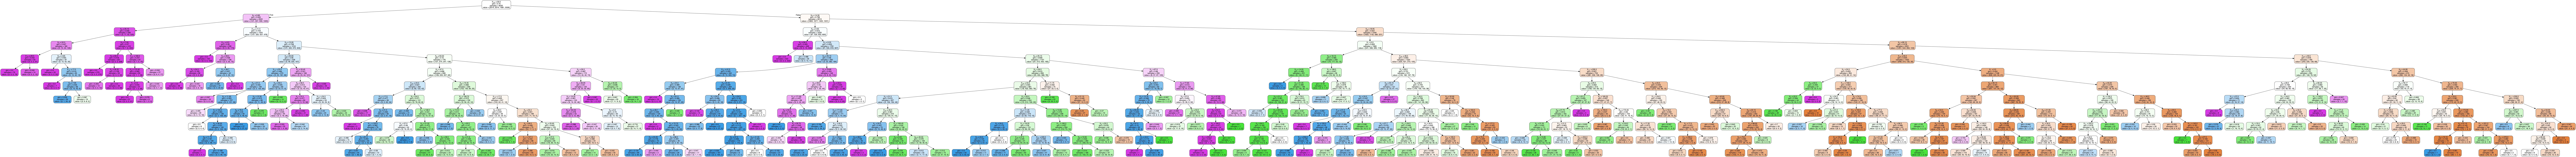

In [52]:
utils.display_tree(model_5)

In [460]:
#sb.pairplot(b_perf, hue="class")

# Predicting test data

In [60]:
pred = model_5.predict(x_test)
predition_data = x_test.copy()
predition_data["actual labels"]= y_test.copy()
predition_data["predicted class"]=pred
predition_data

age  Male gender  Female gender  height_cm  weight_kg  body fat_%  \
3685   42.0            0              1      167.9      67.00        23.3   
6297   21.0            1              0      166.6      57.04         9.5   
1582   36.0            0              1      162.5      57.80        27.6   
13013  26.0            1              0      179.3      66.82        13.4   
4000   51.0            0              1      160.4      60.70        35.2   
...     ...          ...            ...        ...        ...         ...   
5589   55.0            0              1      153.5      50.78        33.7   
10178  61.0            0              1      154.8      54.60        26.8   
6749   37.0            1              0      163.0      59.80        24.9   
4031   22.0            0              1      155.0      51.50        23.6   
7176   31.0            1              0      173.5      88.20        22.9   

       diastolic  systolic  gripForce  sit and bend forward_cm  \
3685        75.0     127.0       36.4                     18.8   
6297        59.0     107.0       35.7                     27.5   
1582        99.0     158.0       29.4                     19.5   
13013       85.0     154.0       51.9                     10.5   
4000        58.0     117.0       24.7                     16.4   
...          ...       ...        ...                      ...   
5589        63.0     136.0       28.4                     22.5   
10178       67.0     114.0       23.5                     24.8   
6749        78.0     126.0       42.6                     13.0   
4031        70.0     122.0       31.7                     16.8   
7176        74.0     120.0       48.8                     22.0   

       sit-ups counts  broad jump_cm actual labels predicted class  
3685             31.0          178.0             A               B  
6297             56.0          232.0             A               B  
1582             43.0          183.0             A               A  
13013            57.0          240.0             B               B  
4000              4.0          123.0             D               D  
...               ...            ...           ...             ...  
5589             10.0          160.0             C               D  
10178            25.0          151.0             A               B  
6749             34.0          215.0             C               C  
4031             32.0          136.0             C               B  
7176             48.0          210.0             C               B  

[2679 rows x 14 columns]

In [62]:
print("Testing Accuracy: ", model_5.score(x_test,y_test))

Testing Accuracy:  0.6774916013437849
